<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · PEC2</p>
<p style="margin: 0; text-align:right;">2021-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC2: Redes Neuronales Convolucionales con KERAS

# Autor: Mario Ubierna San Mamés

A lo largo de esta práctica vamos a implementar varios modelos de redes neuronales para clasificar las imágenes de la base de datos [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html).

La base de datos CIFAR10 está formada por imágenes en color de dimensiones 32x32 píxels que pertenecen a 10 clases:

- airplane (label 0)
- automobile (label 1)
- bird (label 2)
- cat (label 3)
- deer (label 4)
- dog (label 5)
- frog (label 6)
- horse (label 7)
- ship (label 8)
- truck (label 9)

Esta base de datos está compuesta de 60.000 registros que se dividen a su vez en 2 conjuntos: 50.000 imágenes para el conjunto de entrenamiento y 10.000 imágenes para el conjunto de test.

En el ejercicio llevaremos a cabo la tarea de construir varios modelos con el objetivo de conseguir la mayor precisión al realizar la clasificación de las imágenes. Para ello implementaremos y analizaremos los siguientes modelos: 
​
1. Una red neuronal artificial completamente conectada
2. Una red neuronal convolucional de una capa
3. Una red neuronal convolucional profunda

​
En todos los casos se utilizará la librería Keras con Tensorflow para la implementación del modelo, la compilación y el entrenamiento.

Finalmente, realizaremos una predicción de las imágenes con el mejor modelo implementado.

​
**Importante: Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html donde se vea el código y los resultados y comentarios de cada ejercicio. Para exportar el notebook a html puede hacerse desde el menú File $\to$ Download as $\to$ HTML.**

## 1. Descarga, análisis y pre-procesado de los datos (1,5 puntos)

### 1.1 Descarga de datos
Empezamos importando algunos paquetes para la realización de la práctica y procedemos a descargar el dataset.

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import cv2

In [2]:
# Descarga el dataset CIFAR10 y hace la partición train/test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


### 1.2 Análisis de los datos
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Representar la dimensión de las variables X_train, y_train, X_test e y_test.

Mostrar las imágenes de los primeros 10 registros del conjunto X_train junto con sus etiquetas en formato texto.

**Nota**: Al ser las imágenes de pequeño tamaño (32x32) se recomienda escalarlas a la hora de representarlas.
</div>

In [3]:
# Función que dado el número de la etiqueta devuelve la etiqueta correspondiente
def getTag(number_tag):
  if number_tag == 0:
    return "airplane"
  if number_tag == 1:
    return "automobile"
  if number_tag == 2:
    return "bird"
  if number_tag == 3:
    return "cat"
  if number_tag == 4:
    return "deer"
  if number_tag == 5:
    return "dog"
  if number_tag == 6:
    return "frog"
  if number_tag == 7:
    return "horse"
  if number_tag == 8:
    return "ship"
  if number_tag == 9:
    return "truck"

In [4]:
# Análisis del conjunto de datos descargado

# Representar las dimensiones de las variables X_train, y_train, X_test e y_test
print("Las dimensiones de X_train son: " + str(X_train.shape))
print("Las dimensiones de y_train son: " + str(y_train.shape))
print("Las dimensiones de X_test son: " + str(X_test.shape))
print("Las dimensiones de y_test son: " + str(y_test.shape))

Las dimensiones de X_train son: (50000, 32, 32, 3)
Las dimensiones de y_train son: (50000, 1)
Las dimensiones de X_test son: (10000, 32, 32, 3)
Las dimensiones de y_test son: (10000, 1)


<function matplotlib.pyplot.tight_layout>

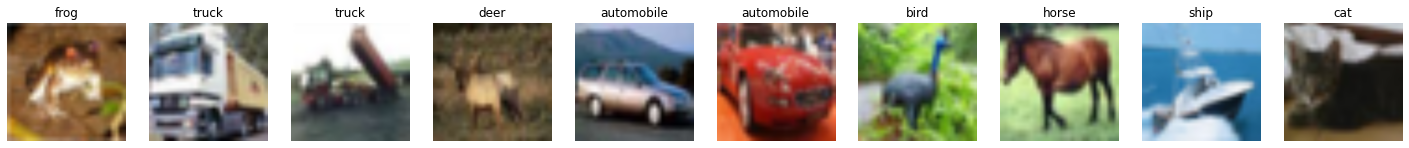

In [5]:
# Mostrar las imágenes de los 10 primeros registros de X_train junto con sus etiquetas
fig, axis = plt.subplots(1, 10, figsize=(25, 3))
for i, ax in enumerate(axis):
  tag = getTag(y_train[i])
  img = cv2.resize(X_train[i], (256,256))
  ax.set_title(tag)
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout

### 1.3 Pre-procesado de datos
Dado que las imágenes están en color, vamos a convertirlas a escala de grises para realizar las primeras clasificaciones. Para ello utilizaremos la función `cvtColor` del paquete [OpenCV](https://pypi.org/project/opencv-python/) (cv2)

In [6]:
# Convierte X_train y X_test a escala de grises
X_train_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,25 pts.]:</strong> Representar la dimensión de las variables X_train_grey y X_test_grey.

Mostrar las imágenes de los primeros 10 registros del conjunto X_train_grey junto con sus etiquetas en formato texto.
</div>

In [7]:
# Representación de las dimensiones de X_train_grey y X_test_grey
print("Las dimensiones de X_train_grey son: " + str(X_train_grey.shape))
print("Las dimensiones de X_test_grey son: " + str(X_test_grey.shape))

Las dimensiones de X_train_grey son: (50000, 32, 32)
Las dimensiones de X_test_grey son: (10000, 32, 32)


<function matplotlib.pyplot.tight_layout>

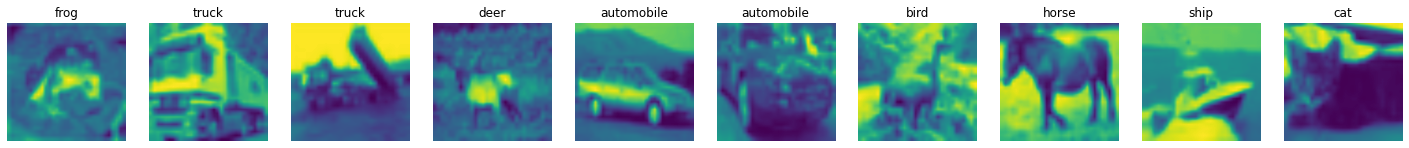

In [8]:
# Mostrar las imágenes de los 10 primeros registros de X_train_grey junto con sus etiquetas
fig, axis = plt.subplots(1, 10, figsize=(25, 3))
for i, ax in enumerate(axis):
  tag = getTag(y_train[i])
  img = cv2.resize(X_train_grey[i], (256,256))
  ax.set_title(tag)
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout

El primer paso para entrenar una red neuronal consiste en pre-procesar los datos de entrenamiento y test para que cuadren con el formato esperado por las entradas y salidas de la red neuronal.

Empezaremos normalizando los datos de entrada para que estén en el rango [0,1] ya que, como podemos ver a continuación, se trata de valores enteros entre 0 y 255.

In [9]:
print("Los valores del primer registro de X_train_grey son: {}".format(X_train_grey[0]))

Los valores del primer registro de X_train_grey son: [[ 62  45  47 ... 128 121 120]
 [ 20   0   7 ...  82  77  82]
 [ 23   6  24 ...  78  78  68]
 ...
 [152 123 125 ... 117  27  32]
 [131 104 115 ... 136  58  51]
 [139 123 130 ... 174 112  90]]


In [10]:
# Determinar valores mínimo y máximo
v_min = np.min(X_train_grey)
v_max = np.max(X_train_grey)
print("Los valores mínimo y máximo son {} y {}.".format(v_min, v_max))

Los valores mínimo y máximo son 0 y 255.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Normalizar los datos de entrada a la red para que estén comprendidos en el rango [0,1]. Imprimir los datos del primer registro una vez se ha llevado a cabo la normalización y comprobar de nuevo los valores máximo y mínimo. 
</div>

In [11]:
# Normalizamos los datos de train
X_train_grey_normalized = X_train_grey.astype('float32')
X_train_grey_normalized = X_train_grey_normalized / 255.0

# Imprimimos los datos del primer registro
print("Primer registro")
print(X_train_grey_normalized[0])

# Valores mínimos y máximos
v_min = np.min(X_train_grey_normalized)
v_max = np.max(X_train_grey_normalized)
print("\nLos valores mínimo y máximo son {} y {}.".format(v_min, v_max))

Primer registro
[[0.24313726 0.1764706  0.18431373 ... 0.5019608  0.4745098  0.47058824]
 [0.07843138 0.         0.02745098 ... 0.32156864 0.3019608  0.32156864]
 [0.09019608 0.02352941 0.09411765 ... 0.30588236 0.30588236 0.26666668]
 ...
 [0.59607846 0.48235294 0.49019608 ... 0.45882353 0.10588235 0.1254902 ]
 [0.5137255  0.40784314 0.4509804  ... 0.53333336 0.22745098 0.2       ]
 [0.54509807 0.48235294 0.50980395 ... 0.68235296 0.4392157  0.3529412 ]]

Los valores mínimo y máximo son 0.0 y 1.0.


In [12]:
# Normalizamos los datos de test
X_test_grey_normalized = X_test_grey.astype('float32')
X_test_grey_normalized = X_test_grey_normalized / 255.0

# Imprimimos los datos del primer registro
print("Primer registro")
print(X_test_grey_normalized[0])

# Valores mínimos y máximos
v_min = np.min(X_test_grey_normalized)
v_max = np.max(X_test_grey_normalized)
print("\nLos valores mínimo y máximo son {} y {}.".format(v_min, v_max))

Primer registro
[[0.38431373 0.38039216 0.4        ... 0.32156864 0.30980393 0.28627452]
 [0.38431373 0.36862746 0.38431373 ... 0.31764707 0.3019608  0.29411766]
 [0.3764706  0.35686275 0.36862746 ... 0.32941177 0.31764707 0.29803923]
 ...
 [0.52156866 0.42352942 0.3764706  ... 0.4117647  0.2784314  0.36078432]
 [0.49019608 0.43137255 0.3647059  ... 0.3529412  0.34901962 0.28235295]
 [0.45882353 0.44313726 0.38039216 ... 0.33333334 0.36078432 0.29411766]]

Los valores mínimo y máximo son 0.0 y 1.0.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,25 pts.]:</strong> Codificar los valores de las etiquetas de salida en un vector one-hot. Por ejemplo, el vector de salida para una imagen que contiene un 5 sería: [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]. Comprobar el resultado imprimiendo su dimensión y mostrando algún registro.
</div>

**Nota**: Se puede utilizar la función `to_categorical` de `tensorflow.keras.utils`. 

In [13]:
# Codificación one-hot para train
y_train_onehot = to_categorical(y_train, dtype="uint8")

# Comprobamos la dimensión
print("Las dimensiones de y_train_onehot son: " + str(y_train_onehot.shape))

# Mostramos algunos ejemplo
print("Los 5 primeros regitron son: ")
for i in range(5):
  print(str(y_train[i]) + " -> " + str(y_train_onehot[i]) + "\t(" + getTag(y_train[i]) +")")

Las dimensiones de y_train_onehot son: (50000, 10)
Los 5 primeros regitron son: 
[6] -> [0 0 0 0 0 0 1 0 0 0]	(frog)
[9] -> [0 0 0 0 0 0 0 0 0 1]	(truck)
[9] -> [0 0 0 0 0 0 0 0 0 1]	(truck)
[4] -> [0 0 0 0 1 0 0 0 0 0]	(deer)
[1] -> [0 1 0 0 0 0 0 0 0 0]	(automobile)


In [14]:
# Codificación one-hot para test
y_test_onehot = to_categorical(y_test, dtype="uint8")

# Comprobamos la dimensión
print("Las dimensiones de y_test_onehot son: " + str(y_test_onehot.shape))

# Mostramos algunos ejemplo
print("Los 5 primeros regitron son: ")
for i in range(5):
  print(str(y_test[i]) + " -> " + str(y_test_onehot[i]) + "\t(" + getTag(y_test[i]) +")")

Las dimensiones de y_test_onehot son: (10000, 10)
Los 5 primeros regitron son: 
[3] -> [0 0 0 1 0 0 0 0 0 0]	(cat)
[8] -> [0 0 0 0 0 0 0 0 1 0]	(ship)
[8] -> [0 0 0 0 0 0 0 0 1 0]	(ship)
[0] -> [1 0 0 0 0 0 0 0 0 0]	(airplane)
[6] -> [0 0 0 0 0 0 1 0 0 0]	(frog)


## 2. Red Neuronal Artificial (ANN) completamente conectada [2,5 puntos]

A continuación implementaremos una red neuronal *feed-forward fully connected* y llevaremos a cabo el entrenamiento y test sobre el dataset CIFAR.

### 2.1 Pre-procesado de datos

Dado que en una red neuronal artificial las entradas son unidimensionales, lo primero que tenemos que hacer es redimensionar los datos de entrada (las imágenes) para convertirlos en arrays de una dimensión.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Modificar los conjuntos X_train_grey y X_test_grey para que sus registros sean arrays unidimensionales de dimensión 32x32 = 1024 datos. Comprobad el resultado imprimiendo las dimensiones de las variables.
</div>

In [15]:
# TODO
X_train_gflat = X_train_grey_normalized.reshape(X_train.shape[0], 32*32)
X_test_gflat = X_test_grey_normalized.reshape(X_test.shape[0], 32*32)

print("Las dimensiones de X_train_gflat son: " + str(X_train_gflat.shape))
print("Las dimensiones de X_test_gflat son: " + str(X_test_gflat.shape))

Las dimensiones de X_train_gflat son: (50000, 1024)
Las dimensiones de X_test_gflat son: (10000, 1024)


### 2.2 Creación del modelo


Vamos a usar un modelo `Sequential` de Keras 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [2 pts.]:</strong> Implementa el modelo de red neuronal artificial:
<ul>
<li>   Diseña la arquitectura para el modelo de clasificación con las siguientes características:</li>
   <ul>
   <li> 6 capas ocultas de 128 neuronas.</li>
   <li> 3 capas de Dropout del 20% (rate=0,2) intercaladas cada 2 capas densas. 
   <li> Función de activación de las capas intermedias: ReLU.</li>
   <li> 1 capa de salida con las dimensiones y función de activación adecuadas para realizar la clasificación.
   </ul>

<li>   Imprime el modelo para ver el número de parámetros a entrenar.

<li>   Compila el modelo con la función de pérdida más adecuada, el optimizador SGD, una velocidad de aprendizaje de 0.01, y la métrica Accuracy.</li>

<li>   Ajusta el modelo con 100 épocas y un tamaño del batch de 128. Mide el tiempo de entrenamiento.</li>

<li>   Muestra las gráficas de accuracy y loss. En cada gráfica debe visualizarse la curva de entrenamiento y la de validación. NOTA: Se recomienda hacer una función que imprima ambas gráficas para poder reutilizarla en próximos apartados.</li>
<li>   Realiza la evaluación del modelo para mostrar la pérdida y la precisión final. </li>
</ul>
</div>

In [16]:
# Crear el modelo ANN
model_ann = Sequential()
model_ann.add(Dense(128, activation="relu", input_dim=X_train_gflat.shape[1])) # Capa de entrada + 1ª capa oculta
model_ann.add(Dense(128, activation="relu")) # Segunda capa oculta
model_ann.add(Dropout(rate=0.2)) # Primera capa dropout
model_ann.add(Dense(128, activation="relu")) # Tercera capa oculta
model_ann.add(Dense(128, activation="relu")) # Cuarta capa oculta
model_ann.add(Dropout(rate=0.2)) # Segunda capa dropout
model_ann.add(Dense(128, activation="relu")) # Quinta capa oculta
model_ann.add(Dense(128, activation="relu")) # Sexta capa oculta
model_ann.add(Dropout(rate=0.2)) # Tercera capa dropout
model_ann.add(Dense(y_train_onehot.shape[1], activation="softmax")) # Capa de salida

In [17]:
# Imprimir el modelo para ver el número de parámetros a entrenar
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               1

In [18]:
# Compile
optimizer = SGD(learning_rate=0.01)
model_ann.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [19]:
# Entrenar el modelo
start = timer()

estimator_ann = model_ann.fit(
    X_train_gflat,
    y_train_onehot,
    validation_data=(X_test_gflat, y_test_onehot),
    epochs=100,
    batch_size=128,
    verbose=0 
)

end = timer()

print("El tiempo de entrenamiento es: " + str(round((end - start) / 60, 2)) + " minutos")

El tiempo de entrenamiento es: 2.38 minutos


In [16]:
def plot_prediction(mfit):
  # Visualizamos la evolución de la accuracy
  plt.plot(mfit.history['accuracy'])
  plt.plot(mfit.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()

  # Visualizamos la evolución del error cometido por la red
  plt.plot(mfit.history['loss'])
  plt.plot(mfit.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()

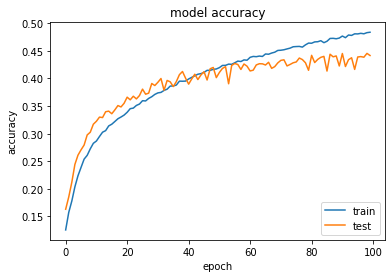

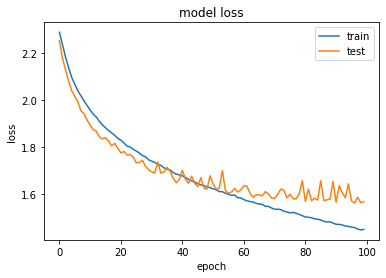

In [20]:
# Plot del training loss y el accuracy
def plot_prediction(mfit):
  # Visualizamos la evolución de la accuracy
  plt.plot(mfit.history['accuracy'])
  plt.plot(mfit.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()

  # Visualizamos la evolución del error cometido por la red
  plt.plot(mfit.history['loss'])
  plt.plot(mfit.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()

plot_prediction(estimator_ann)

### 2.3 Resultados

Como resumen de este ejercicio, destacar que el modelo sí que tiene una buena curva de aprendizaje, ya que a medida que van pasando el número de épocas éste va mejorando la precisión tanto en el entrenamiento como en la validación.

Aunque sí que hay una mejora progresiva, vemos que no es del todo suficiente para categorizar este modelo como un buen modelo, ya que la precisión máxima alcanzada en el entrenamiento es del 50% y en el test del 45%, datos que confirman que aunque el modelo sí que va aprendiendo poco a poco y mejorando su precisión, se parte de una precisión del 15%, no es del todo suficiente como para que el modelo ajuste de forma idónea.

Sería interesente ver si aumentando el número de épocas se consigue una mejor precisión.

Por último vamos a predecir con el conjunto de test cómo de bueno es el modelo, y vemos que no es bueno ya que obtenemos una precisión del 44% para nuevos datos.

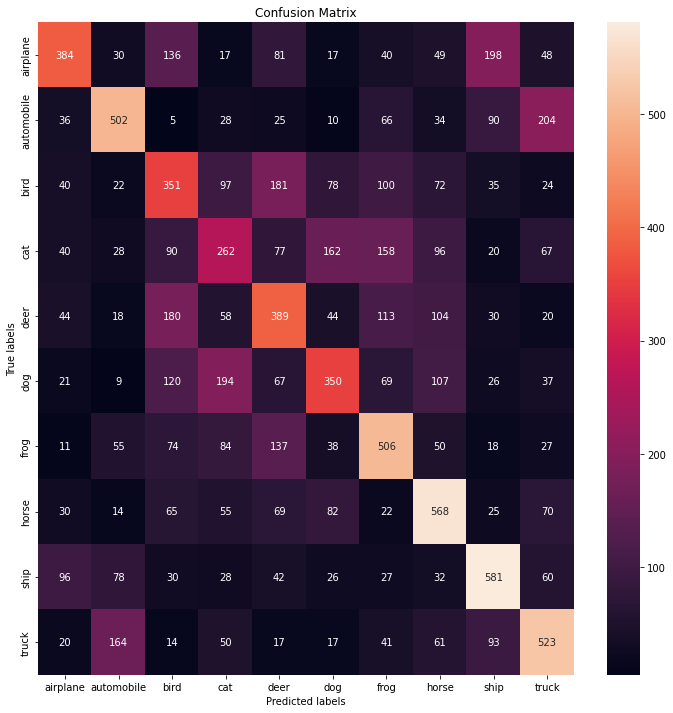



La precisión: 44.16 %


In [45]:
# Predicción
y_preds_labels = []
y_test_labels = []
y_preds = model_ann.predict(X_test_gflat)

# Búsqueda de la etiqueta para las predicciones y
# transformación de y_test con el nombre de la etiqueta
for y_pred, y_test_ in zip(y_preds, y_test):
  y_preds_labels.append(getTag(y_pred.argmax()))
  y_test_labels.append(getTag(y_test_))

# Matriz de confusión
matrix = confusion_matrix(y_test_labels, y_preds_labels)

# Visualización de la matriz de confusión
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(np.unique(y_preds_labels)))
ax.yaxis.set_ticklabels(list(np.unique(y_preds_labels)))
plt.show()

#Accuracy
accuracy = 0
for i in range(matrix.shape[0]):
  accuracy += matrix[i,i]
accuracy = accuracy / sum(sum(matrix))
print("\n\nLa precisión: " + str(round(accuracy * 100, 2)) + " %")

In [51]:
count = 0
for i,j in zip(y_test_labels, y_preds_labels):
  if i == "dog" and j == "cat":
    count += 1
print(count)

194


## 3. Red Neuronal Convolucional de una capa [2.5 puntos]

A continuación implementaremos una red neuronal convolucional de una capa y realizaremos el entrenamiento y test sobre el dataset CIFAR.

Se recomienda, a partir de este punto realizar el entrenamiento en una máquina con GPU (puede activarse en plataformas como Google Colab o Kaggle) con el fin de reducir los tiempos de entrenamiento.

### 3.1 Pre-procesado de datos

El primer paso para entrenar una red neuronal consiste en pre-procesar los datos de entrenamiento y test para que cuadren con las dimensiones de la entrada de la red neuronal.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Ajustar el tamaño de los datos de entrenamiento y test para que tengan 4 dimensiones (la última dimensión tiene que ser 1 para indicar que las imágenes están en escala de grises).
</div>

**Nota**: Utilizar el número de datos de entrenamiento y test y el tamaño de las imágenes.

In [17]:
# TODO
X_train_gDim4 = X_train_grey_normalized.reshape(X_train.shape[0], 32, 32, 1)
X_test_gDim4 = X_test_grey_normalized.reshape(X_test.shape[0], 32, 32, 1)

print("Las dimensiones de X_train_gDim4 son: " + str(X_train_gDim4.shape))
print("Las dimensiones de X_test_gDim4 son: " + str(X_test_gDim4.shape))

Las dimensiones de X_train_gDim4 son: (50000, 32, 32, 1)
Las dimensiones de X_test_gDim4 son: (10000, 32, 32, 1)


### 3.2 Creación del modelo


Se quiere implementar un modelo secuencial de Keras con las siguientes características:

- La primera capa que añadiremos será una capa convolucional con las siguientes propiedades: 
    - Número de kernels (neuronas) de la primera capa oculta: 64 neuronas
    - Tamaño de los kernels: 3x3
    - Activación de los kernels: ReLU
- A continuación añadiremos una capa Flatten para conectar la salida de la capa convolucional con la entrada de una capa densa.
- Por último, añadiremos una capa densa de salida con el número de neuronas y función de activación adecuadas para llevar a cabo la clasificación.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [1,5 pts.]:</strong> Construir el modelo según los requerimientos indicados, además:
<ul>
<li>   Imprime el modelo para ver el número de parámetros a entrenar.

<li>   Compila el modelo con la función de pérdida más adecuada, el optimizador ADAM y la métrica Accuracy.</li>

<li>   Ajusta el modelo con 20 épocas y un tamaño del batch de 128. Mide el tiempo de entrenamiento.</li>

<li>   Muestra las gráficas de accuracy y loss. En cada gráfica debe visualizarse la curva de entrenamiento y la de validación</li>
<li>   Realiza la evaluación del modelo para mostrar la pérdida y la precisión final. </li>
</div>
</ul>

In [53]:
# Crear la CNN monocapa
model_cnn_monocapa = Sequential()
model_cnn_monocapa.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(32,32,1)))
model_cnn_monocapa.add(Flatten())
model_cnn_monocapa.add(Dense(y_train_onehot.shape[1], activation="softmax"))

In [54]:
# Imprimir el modelo para ver el número de parámetros a entrenar
model_cnn_monocapa.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense_7 (Dense)             (None, 10)                576010    
                                                                 
Total params: 576,650
Trainable params: 576,650
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Compile
model_cnn_monocapa.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Entrenamiento del modelo
start = timer()

estimator_cnn_monocapa = model_cnn_monocapa.fit(
    X_train_gDim4,
    y_train_onehot,
    validation_data=(X_test_gDim4, y_test_onehot),
    batch_size=128,
    epochs=20,
    verbose=0
)

end = timer()

print("El tiempo de entrenamiento es: " + str(round((end - start) / 60, 2)) + " minutos")

El tiempo de entrenamiento es: 0.89 minutos


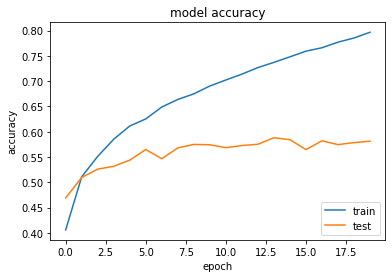

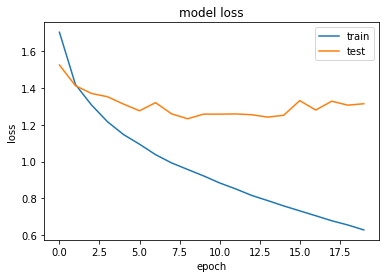

In [57]:
# Resultados
plot_prediction(estimator_cnn_monocapa)

### 3.3 Resultados

En este caso vemos que el número de parámetros a entrenar es mucho mayor que en el ejercicio anterior, para ser más exaxtos hay el doble de parámetros.

Aunque hay más parámetros a entrenar el tiempo de entrenamiento es mucho menor en esta red neuronal, es decir, tarda menos una red neuronal convolucional con GPU que una red neuronal artificial completamente conectada con GPU.

En este modelo, el aprendizaje para el conjunto de train es idóneo, a medida que va aumentado el número de épocas la precisión del modelo para el conjunto de train va mejorando y la pérdida se va reduciendo, hasta tal punto de conseguir un 80% de precisión.

Sin embargo, para el conjunto de test no sucede lo mismo, en este caso apenas hay mejoría según va avanzado y entrenándose la red.

En resumen estamos en un caso de overfitting, para el conjunto de train el modelo se ajusta muy bien, pero para el modelo de test no sucede los mismol, por lo que el modelo no es capaz de generalizar.

Para ver cómo de bueno es el modelo vamos a predecir las etiquetas, haciendo esto obtenemos una precisión del 58%. En este caso el modelo consigue predecir de una mejor forma y tarda menos en entrenarse, por lo que hay una mejora considerable entre hacer uso de una red neuronal completamente conectada y una red neuronal convolucional.

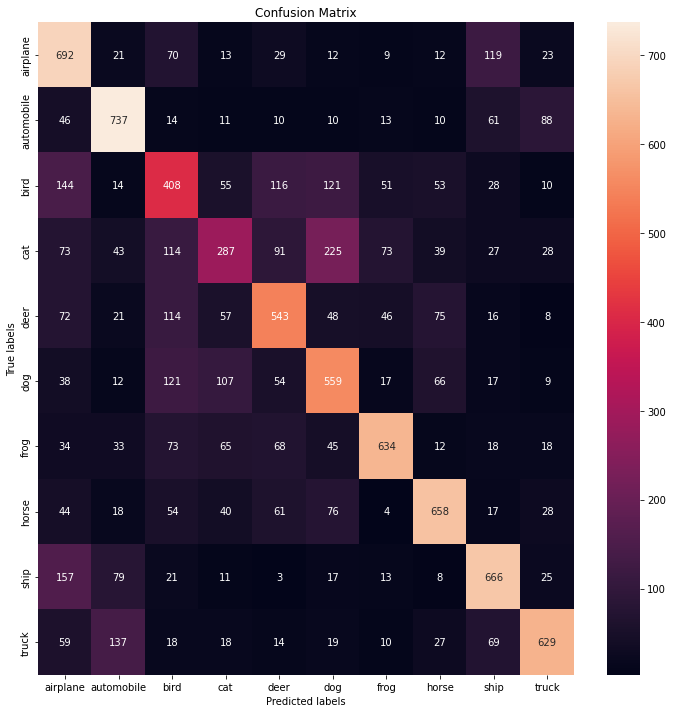



La precisión: 58.13 %


In [59]:
# Predicción
y_preds_labels = []
y_test_labels = []
y_preds = model_cnn_monocapa.predict(X_test_gDim4)

# Búsqueda de la etiqueta para las predicciones y
# transformación de y_test con el nombre de la etiqueta
for y_pred, y_test_ in zip(y_preds, y_test):
  y_preds_labels.append(getTag(y_pred.argmax()))
  y_test_labels.append(getTag(y_test_))

# Matriz de confusión
matrix = confusion_matrix(y_test_labels, y_preds_labels)

# Visualización de la matriz de confusión
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(np.unique(y_preds_labels)))
ax.yaxis.set_ticklabels(list(np.unique(y_preds_labels)))
plt.show()

#Accuracy
accuracy = 0
for i in range(matrix.shape[0]):
  accuracy += matrix[i,i]
accuracy = accuracy / sum(sum(matrix))
print("\n\nLa precisión: " + str(round(accuracy * 100, 2)) + " %")

### 3.4 GPU vs CPU


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Volver a entrenar el modelo desde cero en un entorno sin GPU (sólo con CPU) y compara los tiempos de entrenamiento. Comenta los resultados.
</div>

In [17]:
# Crear la CNN monocapa
model_cnn_monocapa = Sequential()
model_cnn_monocapa.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(32,32,1)))
model_cnn_monocapa.add(Flatten())
model_cnn_monocapa.add(Dense(y_train_onehot.shape[1], activation="softmax"))

In [18]:
# Imprimir el modelo para ver el número de parámetros a entrenar
model_cnn_monocapa.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 10)                576010    
                                                                 
Total params: 576,650
Trainable params: 576,650
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_cnn_monocapa.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Entrenamiento del modelo
start = timer()

estimator_cnn_monocapa = model_cnn_monocapa.fit(
    X_train_gDim4,
    y_train_onehot,
    validation_data=(X_test_gDim4, y_test_onehot),
    batch_size=128,
    epochs=20,
    verbose=0
)

end = timer()

print("El tiempo de entrenamiento es: " + str(round((end - start) / 60, 2)) + " minutos")

El tiempo de entrenamiento es: 9.88 minutos


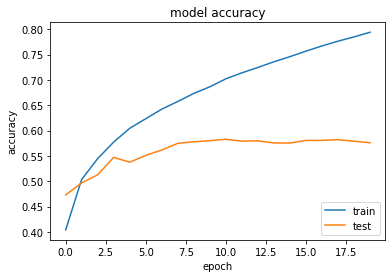

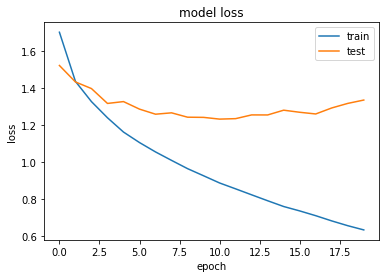

In [21]:
plot_prediction(estimator_cnn_monocapa)

### 3.5 Resultados

En este ejercicio es el mismo modelo pero no haciendo uso de GPU, como podemos apreciar en líneas generales obtenemos un modelo parecido al ejercicio anterior.

La única diferencia destacable es el tiempo que se necesita para el entrenamiento del modelo, en el ejercicio anterior era de 1 minuto y ahora se necesitan casi 10 minutos, es decir, se tarda 10 veces más en resolver la misma tarea y solamente cambiando el uso de GPU y CPU.

Por otro lado, para evaluar la calidad del modelo se ha predicho las etiquetas de nuevo para este modelo con CPU, y la precisión obtenido es muy similar al ejercicio anterior, en este caso se obtiene un 57% por el 58% que obteníamos con GPU.

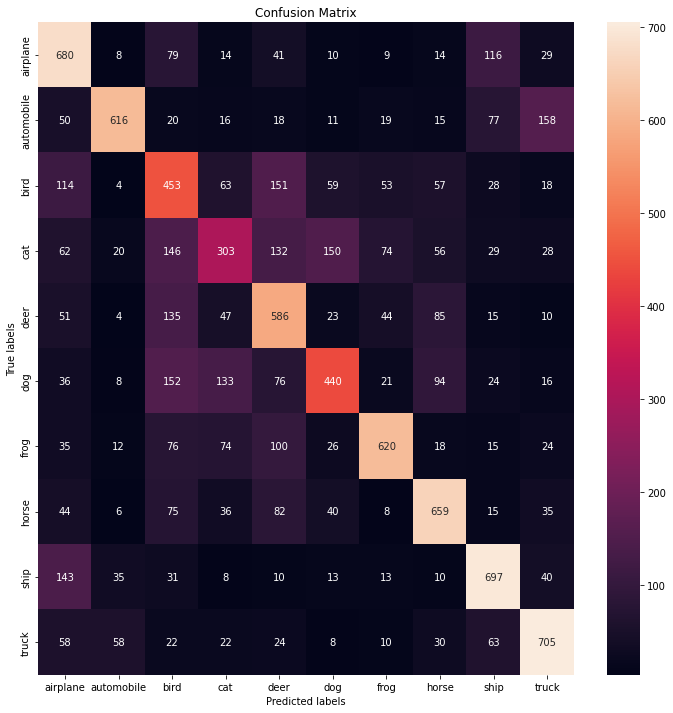



La precisión: 57.59 %


In [22]:
# Predicción
y_preds_labels = []
y_test_labels = []
y_preds = model_cnn_monocapa.predict(X_test_gDim4)

# Búsqueda de la etiqueta para las predicciones y
# transformación de y_test con el nombre de la etiqueta
for y_pred, y_test_ in zip(y_preds, y_test):
  y_preds_labels.append(getTag(y_pred.argmax()))
  y_test_labels.append(getTag(y_test_))

# Matriz de confusión
matrix = confusion_matrix(y_test_labels, y_preds_labels)

# Visualización de la matriz de confusión
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(np.unique(y_preds_labels)))
ax.yaxis.set_ticklabels(list(np.unique(y_preds_labels)))
plt.show()

#Accuracy
accuracy = 0
for i in range(matrix.shape[0]):
  accuracy += matrix[i,i]
accuracy = accuracy / sum(sum(matrix))
print("\n\nLa precisión: " + str(round(accuracy * 100, 2)) + " %")

## 4. Deep CNN con Maxpooling y Dropout [2 puntos]

En el ejercicio anterior hemos implementado una red convolucional de una sola capa. Ahora vamos a implementar una red neuronal convolucional profunda y veremos como esto se traduce en un mejor rendimiento en los resultados.

### 4.1 Creación del modelo


En este caso volveremos a utilizar el modelo `Sequential` de Keras que constará de: 
- Dos capas convolucionales de 32 kernels cada una de tamaño 3x3
- Una capa de MaxPooling con un tamaño de 2x2
- Una capa de Dropout con un rate=0.2
- Dos capas convolucionales de 64 kernels cada una de tamaño 3x3
- Una capa de MaxPooling con un tamaño de 2x2
- Una capa de Dropout con un rate=0.2
- Dos capas convolucionales de 128 kernels cada una de tamaño 3x3
- Una capa de MaxPooling con un tamaño de 2x2
- Una capa de Dropout con un rate=0.2
- Todas las capas convolucionales con función de activación ReLU y padding = same
- Una capa Flatten
- Una capa densa con 128 neuronas y función de activación ReLU
- Una capa de Dropout con un rate=0.2
- Una capa densa de salida con el número de neuronas y la función de activación necesarias para llevar a cabo la clasificación

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [1,5 pts.]:</strong> Construir el modelo según los requerimientos indicados, además:
<ul>
<li>   Imprime el modelo para ver el número de parámetros a entrenar.

<li>   Compila el modelo con la función de pérdida más adecuada, el optimizador SGD (con learning rate de 0.001 y momentum de 0.9) y la métrica Accuracy.</li>

<li>   Ajusta el modelo con 150 épocas y un tamaño del batch de 128. Mide el tiempo de entrenamiento.</li>

<li>   Muestra las gráficas de accuracy y loss. En cada gráfica debe visualizarse la curva de entrenamiento y la de validación</li>
<li>   Realiza la evaluación del modelo para mostrar la pérdida y la precisión final. </li>
</div>
</ul>
</div>

In [18]:
# Crear la CNN profunda
model_cnn_profunda = Sequential()

# Primera etapa - Entrada
model_cnn_profunda.add(Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(32,32,1)))
model_cnn_profunda.add(Conv2D(32, kernel_size=3, activation="relu", padding="same"))
model_cnn_profunda.add(MaxPooling2D(pool_size=2))
model_cnn_profunda.add(Dropout(rate=0.2))

# Segunda etapa
model_cnn_profunda.add(Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model_cnn_profunda.add(Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model_cnn_profunda.add(MaxPooling2D(pool_size=2))
model_cnn_profunda.add(Dropout(rate=0.2))

# Tercera etapa
model_cnn_profunda.add(Conv2D(128, kernel_size=3, activation="relu", padding="same"))
model_cnn_profunda.add(Conv2D(128, kernel_size=3, activation="relu", padding="same"))
model_cnn_profunda.add(MaxPooling2D(pool_size=2))
model_cnn_profunda.add(Dropout(rate=0.2))

# Cuarta etapa
model_cnn_profunda.add(Flatten())
model_cnn_profunda.add(Dense(128, activation="relu"))
model_cnn_profunda.add(Dropout(rate=0.2))

# Quinta etapa - Salida
model_cnn_profunda.add(Dense(y_train_onehot.shape[1], activation="softmax"))

In [19]:
# Número de parámetros
model_cnn_profunda.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [20]:
# Compile
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model_cnn_profunda.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [21]:
# Entrenamiento del modelo
start = timer()

estimator_cnn_profunda = model_cnn_profunda.fit(
    X_train_gDim4,
    y_train_onehot,
    validation_data=(X_test_gDim4, y_test_onehot),
    batch_size=128,
    epochs=150,
    verbose=0
)

end = timer()

print("El tiempo de entrenamiento es: " + str(round((end - start) / 60, 2)) + " minutos")

El tiempo de entrenamiento es: 30.39 minutos


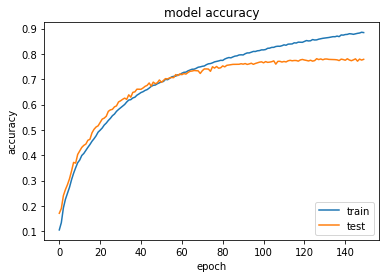

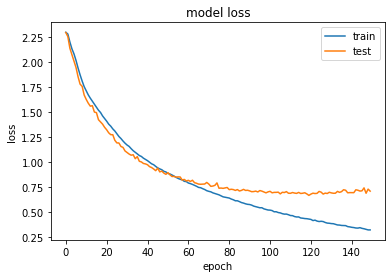

In [22]:
# Resultados
plot_prediction(estimator_cnn_profunda)

### 4.2 Resultados

En este caso, estamos frente a un modelo que se ajusta muy bien, es decir, tanto para el conjunto de test como para el de train se consiguen altas precisiones. 

Otro punto a destacar es que el aprendizaje se realiza de forma exponencial, esto lo podemos observar en las dos anteriores gráficas, haciendo que a medida que aumenta el número de épocas aumenta la precisión y se reduce la pérdida.

Podemos apreciar que se realiza un ligero overfitting, es decir, desde la época 60 hasta la 140 no se produce una mejoría ni en la precisión ni en la pérdida en la validación, pero sin embargo en el conjunto de train sí que va mejorando. Aún así, este modelo es el que mejor precisión proporciona.

El número de parámetros a entrenar es muy elevado frente a los que se necesitaban en la red neuronal artificial completamente conectada, pero este número es similar a las red neuronal convolucional monocapa, sin embargo la precisión que obtenemos en este caso es la mejor de todas.

Un punto negativo de este modelo frente a los demás es que tarda mucho más en entrenarse, en lo casos anterior se tarda entre 1 y 10 minutos, pero en este caso se necesita 30 min para entrenar el modelo.

Finalmente, la precisión obtenida para el conjunto de test es del 78%, la máxima alcanzada hasta el momento, haciendo a este modelo el favorito en lo que llevamos de análisis.

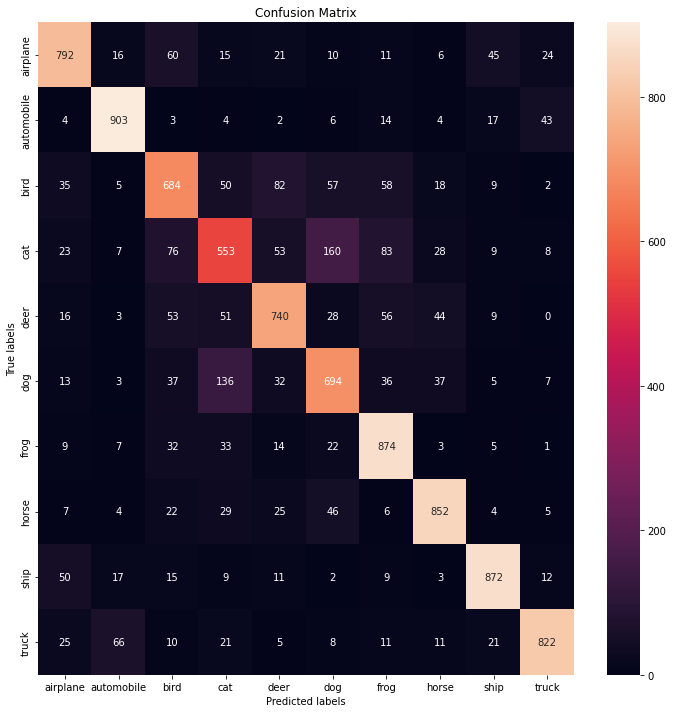



La precisión: 77.86 %


In [23]:
# Predicción
y_preds_labels = []
y_test_labels = []
y_preds = model_cnn_profunda.predict(X_test_gDim4)

# Búsqueda de la etiqueta para las predicciones y
# transformación de y_test con el nombre de la etiqueta
for y_pred, y_test_ in zip(y_preds, y_test):
  y_preds_labels.append(getTag(y_pred.argmax()))
  y_test_labels.append(getTag(y_test_))

# Matriz de confusión
matrix = confusion_matrix(y_test_labels, y_preds_labels)

# Visualización de la matriz de confusión
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(np.unique(y_preds_labels)))
ax.yaxis.set_ticklabels(list(np.unique(y_preds_labels)))
plt.show()

#Accuracy
accuracy = 0
for i in range(matrix.shape[0]):
  accuracy += matrix[i,i]
accuracy = accuracy / sum(sum(matrix))
print("\n\nLa precisión: " + str(round(accuracy * 100, 2)) + " %")

### 4.3 CNN con imágenes en color


Finalmente vamos a estudiar la influencia del color de las imágenes en la *performance* de la clasificación.

Para ello utilizaremos una red convolucional con la misma estructura de la red del apartado anterior pero cambiando la capa de entrada para que podamos introducir las imágenes originales en color, arrays de dimensión (32, 32, 3).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts]:</strong> Volver a realizar el ejercicio anterior pero modificando la capa de entrada para poder utilizar el conjunto de datos original, de tamaño (50000, 32, 32, 3) para el conjunto de train y (10000, 32, 32, 3) para el conjunto de test.

¿Influye el color de las imágenes en el resultado de la clasificación? Comentar el resultado.
</div>

**Nota**: Recordar normalizar las imágenes para que sus valores estén entre 0 y 1.

In [24]:
# Normalizamos los datos de train
X_train_normalized = X_train.astype('float32')
X_train_normalized = X_train_normalized / 255.0

# Valores mínimos y máximos
v_min = np.min(X_train_normalized)
v_max = np.max(X_train_normalized)
print("\nLos valores mínimo y máximo son {} y {}.".format(v_min, v_max))


Los valores mínimo y máximo son 0.0 y 1.0.


In [25]:
# Normalizamos los datos de test
X_test_normalized = X_test.astype('float32')
X_test_normalized = X_test_normalized / 255.0

# Valores mínimos y máximos
v_min = np.min(X_test_normalized)
v_max = np.max(X_test_normalized)
print("\nLos valores mínimo y máximo son {} y {}.".format(v_min, v_max))


Los valores mínimo y máximo son 0.0 y 1.0.


In [26]:
# Crear la CNN profunda
model_cnn_profunda_color = Sequential()

# Primera etapa - Entrada
model_cnn_profunda_color.add(Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(32,32,3)))
model_cnn_profunda_color.add(Conv2D(32, kernel_size=3, activation="relu", padding="same"))
model_cnn_profunda_color.add(MaxPooling2D(pool_size=2))
model_cnn_profunda_color.add(Dropout(rate=0.2))

# Segunda etapa
model_cnn_profunda_color.add(Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model_cnn_profunda_color.add(Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model_cnn_profunda_color.add(MaxPooling2D(pool_size=2))
model_cnn_profunda_color.add(Dropout(rate=0.2))

# Tercera etapa
model_cnn_profunda_color.add(Conv2D(128, kernel_size=3, activation="relu", padding="same"))
model_cnn_profunda_color.add(Conv2D(128, kernel_size=3, activation="relu", padding="same"))
model_cnn_profunda_color.add(MaxPooling2D(pool_size=2))
model_cnn_profunda_color.add(Dropout(rate=0.2))

# Cuarta etapa
model_cnn_profunda_color.add(Flatten())
model_cnn_profunda_color.add(Dense(128, activation="relu"))
model_cnn_profunda_color.add(Dropout(rate=0.2))

# Quinta etapa - Salida
model_cnn_profunda_color.add(Dense(y_train_onehot.shape[1], activation="softmax"))

In [31]:
model_cnn_profunda_color.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [27]:
# Compile
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model_cnn_profunda_color.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [28]:
# Entrenamiento del modelo
start = timer()

estimator_cnn_profunda_color = model_cnn_profunda_color.fit(
    X_train_normalized,
    y_train_onehot,
    validation_data=(X_test_normalized, y_test_onehot),
    batch_size=128,
    epochs=150,
    verbose=0
)

end = timer()

print("El tiempo de entrenamiento es: " + str(round((end - start) / 60, 2)) + " minutos")

El tiempo de entrenamiento es: 30.39 minutos


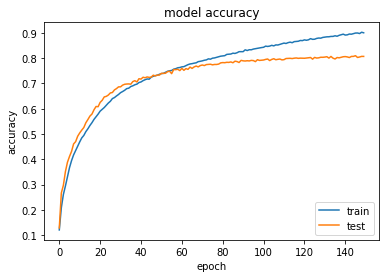

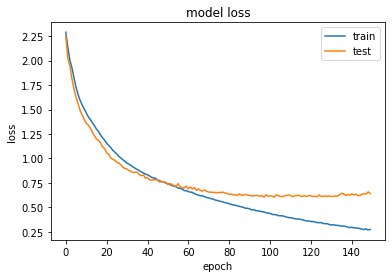

In [29]:
# Resultados
plot_prediction(estimator_cnn_profunda_color)

### 4.4 Resultados

En este caso, presentamos unos resultados similares al modelo anterior, es decir, a medida que va aumentando el número de épocas aumenta la precisión y se reduce la pérdida.

La mejora del modelo se deja de producir a partir de la época 70, antes de esa época mejora de forma exponencial pero a partir de ahí el crecimiento es lineal.

El número de parámetros que se necesitan para el aprendizaje del modelo es muy similar al ejercicio anterior, por lo que el número de canales de una imagen no afecta demasiado al número de parámetros.

El tiempo que necesita la red en aprender es elvado, para ser más exactos tarda aproximadamente 30 minutos, mismo tiempo que se necesitaba en el modelo anterior, y muchísimo más que en los modelos anteriores.

Para concluir, la precisión final obtenida con este modelo es del 81%, haciendo que éste sea el mejor modelo para resolver este problema de clasificación.

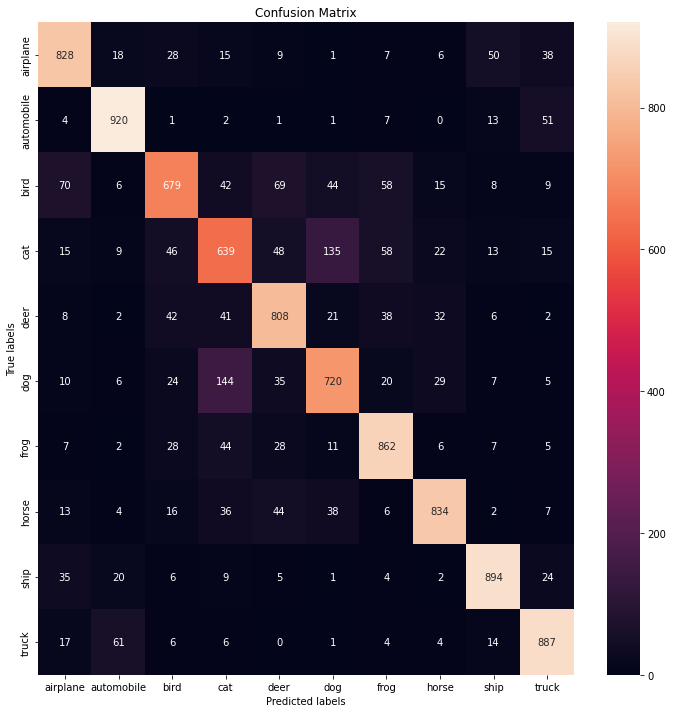



La precisión: 80.71 %


In [30]:
# Predicción
y_preds_labels = []
y_test_labels = []
y_preds = model_cnn_profunda_color.predict(X_test_normalized)

# Búsqueda de la etiqueta para las predicciones y
# transformación de y_test con el nombre de la etiqueta
for y_pred, y_test_ in zip(y_preds, y_test):
  y_preds_labels.append(getTag(y_pred.argmax()))
  y_test_labels.append(getTag(y_test_))

# Matriz de confusión
matrix = confusion_matrix(y_test_labels, y_preds_labels)

# Visualización de la matriz de confusión
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(np.unique(y_preds_labels)))
ax.yaxis.set_ticklabels(list(np.unique(y_preds_labels)))
plt.show()

#Accuracy
accuracy = 0
for i in range(matrix.shape[0]):
  accuracy += matrix[i,i]
accuracy = accuracy / sum(sum(matrix))
print("\n\nLa precisión: " + str(round(accuracy * 100, 2)) + " %")

## 5. Comparativa de los modelos implementados y predicción [1,5 puntos]

En este último apartado compararemos los modelos implementados y realizaremos la clasificación de algunas imágenes con el modelo que ha dado los mejores resultados.

### 5.1 Comparativa de los modelos implementados

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Realizar una comparativa de los modelos implementados comentando:

*   La precisión obtenida
*   La pérdida
*   El tiempo de entrenamiento
*   El número de parámetros a entrenar

Comentar los resultados obtenidos.

En base a los resultados obtenidos ¿Qué modelo seleccionaríais como el mejor?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Solución:</strong> 
</div>

### 5.2 Análisis de la mejor solución

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Realizar un análisis de las medidas estadísticas más relevantes del modelo seleccionado en el apartado anterior y representar su matriz de confusión.

¿Qué clase es la que mejor se predice? ¿Y la que peor resultados obtiene?

Comentar los resultados

In [ ]:
# Informe
# TODO

In [ ]:
# Matriz de confusión
# TODO

### 5.3 Predicción de algunas imágenes del conjunto de test

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Visualizar diez imágenes al azar del conjunto de test. Mostrar la etiqueta real y la predicción.
</div>

In [ ]:
# Visualización
# TODO